# Problem statement:

We have to find out number person that survive in Titanic sink. 

# Import Libraries

In [1]:
import os
import sys
import pandas
import numpy
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")
%matplotlib inline

# Load Datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train.info() # From info() we can also find out all NaN values in each coliumns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [8]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [9]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

# Pre-processing Data

In [12]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train['Embarked'].fillna('S',inplace=True)

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [15]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [16]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [17]:
# In Train data ,Age column has 177 missing values,that is about 20% data is missing ,so we will not delete Age column from Train data.
(177/891)*100

19.865319865319865

### Filling up NaN Values in both train and test data

In [18]:
train_age=  np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean() + train['Age'].std(),177)

In [19]:
test_age = np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean() + test['Age'].std(),86)

In [20]:
train['Age'][train['Age'].isnull()]= train_age

In [21]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
test['Age'][test['Age'].isnull()]= test_age

In [23]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


# EDA(Exploratory Data Analysis)

In [26]:
train[train['Pclass'] == 1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [27]:
train[train['Pclass'] == 2]['Survived'].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [28]:
train[train['Pclass'] == 3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [29]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [30]:
119/(372+119)

0.24236252545824846

In [31]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

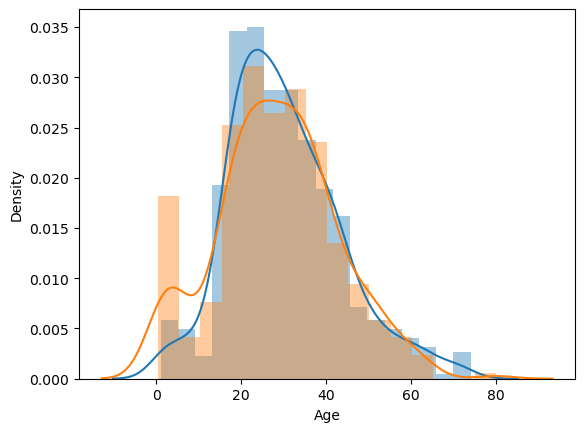

In [32]:
sns.distplot(train['Age'][train['Survived']== 0])
sns.distplot(train['Age'][train['Survived']==1])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

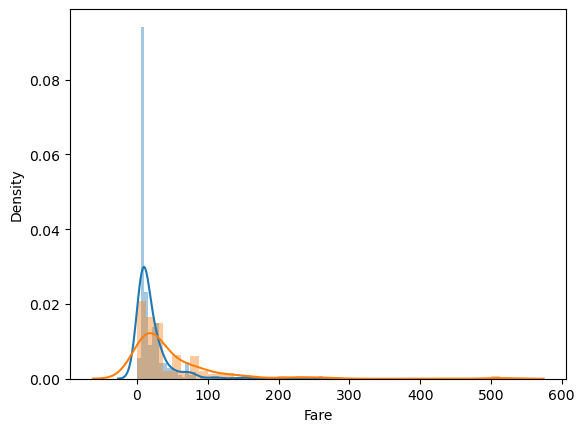

In [33]:
sns.distplot(train['Fare'][train['Survived']== 0])
sns.distplot(train['Fare'][train['Survived']==1])

In [34]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace = True)

In [35]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [37]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3


In [38]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [39]:
test['Family'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: Family, dtype: int64

In [40]:
train.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [41]:
def cal(number):
    if number == 1:
        return "Alone"
    elif number > 1 and number < 5:
        return "Medium"
    else:
        return "Large"

In [42]:
train['Family_size'] = train['Family'].apply(cal)

In [43]:
test['Family_size'] = test['Family'].apply(cal)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,Medium


In [46]:
train.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [47]:
test.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Alone


In [49]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S,Medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,S,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S,Medium


In [50]:
train.shape

(891, 9)

In [51]:
test.shape

(418, 8)

In [52]:
passengerId = test['PassengerId'].values

In [53]:
train.drop(columns=['PassengerId','Name','Fare'],inplace=True)
test.drop(columns=['PassengerId','Name','Fare'],inplace=True)

In [54]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Family_size
0,0,3,male,22.0,S,Medium
1,1,1,female,38.0,C,Medium
2,1,3,female,26.0,S,Alone
3,1,1,female,35.0,S,Medium
4,0,3,male,35.0,S,Alone


In [55]:
test.head()

,Pclass,Sex,Age,Embarked,Family_size
0,3,male,34.5,Q,Alone
1,3,female,47.0,S,Medium
2,2,male,62.0,Q,Alone
3,3,male,27.0,S,Alone
4,3,female,22.0,S,Medium


In [56]:
train = pd.get_dummies(train,columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True)

In [57]:
train.shape

(891, 9)

In [58]:
train.head()

,Survived,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
0,0,22.0,0,1,1,0,1,0,1
1,1,38.0,0,0,0,0,0,0,1
2,1,26.0,0,1,0,0,1,0,0
3,1,35.0,0,0,0,0,1,0,1
4,0,35.0,0,1,1,0,1,0,0


In [59]:
test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True)

In [60]:
test.shape

(418, 8)

In [61]:
test.head()

,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
0,34.5,0,1,1,1,0,0,0
1,47.0,0,1,0,0,1,0,1
2,62.0,1,0,1,1,0,0,0
3,27.0,0,1,1,0,1,0,0
4,22.0,0,1,0,0,1,0,1


# Building Model

In [62]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [66]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred = dtc.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
print(accuracy_score(y_pred,y_test))

0.770949720670391


In [70]:
Xf = test.iloc[:,:].values

In [71]:
y_final = dtc.predict(Xf)

In [72]:
y_final.shape

(418,)

In [73]:
passengerId.shape

(418,)

In [74]:
# Way to create Empty DataFrame
final = pd.DataFrame() 

In [75]:
final['passengerId'] = passengerId
final['survived'] = y_final

In [76]:
final.to_csv('submission_titanic.csv',index = False)

#  Thank You!